In [1]:
#install.packages('ggthemes', repos='http://cran.us.r-project.org')
#install.packages("svglite", repos='http://cran.us.r-project.org')

In [2]:
setwd('C:/Users/Falco/Desktop/directory/Cattle_AMR_2/outputs/')
imp = read.csv('RFimp_data.csv', header =T)
head(imp)

,X,factor,importance,model
,<int>,<fct>,<dbl>,<fct>
1,0,NumberCulled,1.0000000,All bacteria
2,1,CullTimesMonth,0.9331535,All bacteria
3,2,FreqELDU,0.8409433,All bacteria
4,3,RollingHerdAvg,0.8326556,All bacteria
5,4,Jersey,0.7548137,All bacteria
6,5,CullPctMonth,0.7322618,All bacteria


In [3]:
modellist = unique(imp$model)
modellist

[1] All bacteria     Commensals       Enterococcus sp. E. coli         
[5] Salmonella sp.  
Levels: All bacteria Commensals E. coli Enterococcus sp. Salmonella sp.

In [4]:
library(ggplot2)
library(ggthemes)

In [5]:
xfactors = unique(imp$factor)
xfactors

[1] NumberCulled     CullTimesMonth   FreqELDU         RollingHerdAvg  
 [5] Jersey           CullPctMonth     Holstein         PctInject       
 [9] HerdSize         Season           Chalk4Withdrawal LowMilkCull     
[13] ReproCull        MastitisCull     OtherCull       
15 Levels: Chalk4Withdrawal CullPctMonth CullTimesMonth FreqELDU ... Season

In [6]:
length(xfactors)

[1] 15

In [7]:
label <- gsub(" ","",paste(round(imp$importance,2)))
label

[1] "1"    "0.93" "0.84" "0.83" "0.75" "0.73" "0.71" "0.68" "0.67" "0.31"
[11] "1"    "0.99" "0.97" "0.9"  "0.81" "0.67" "0.57" "0.57" "0.53" "0.44"
[21] "1"    "0.75" "0.7"  "0.67" "0.62" "0.6"  "0.5"  "0.39" "0.38" "0.37"
[31] "1"    "0.93" "0.91" "0.77" "0.55" "0.42" "0.42" "0.42" "0.29" "0.24"
[41] "1"    "0.95" "0.82" "0.6"  "0.59" "0.58" "0.55" "0.51" "0.5"  "0.45"

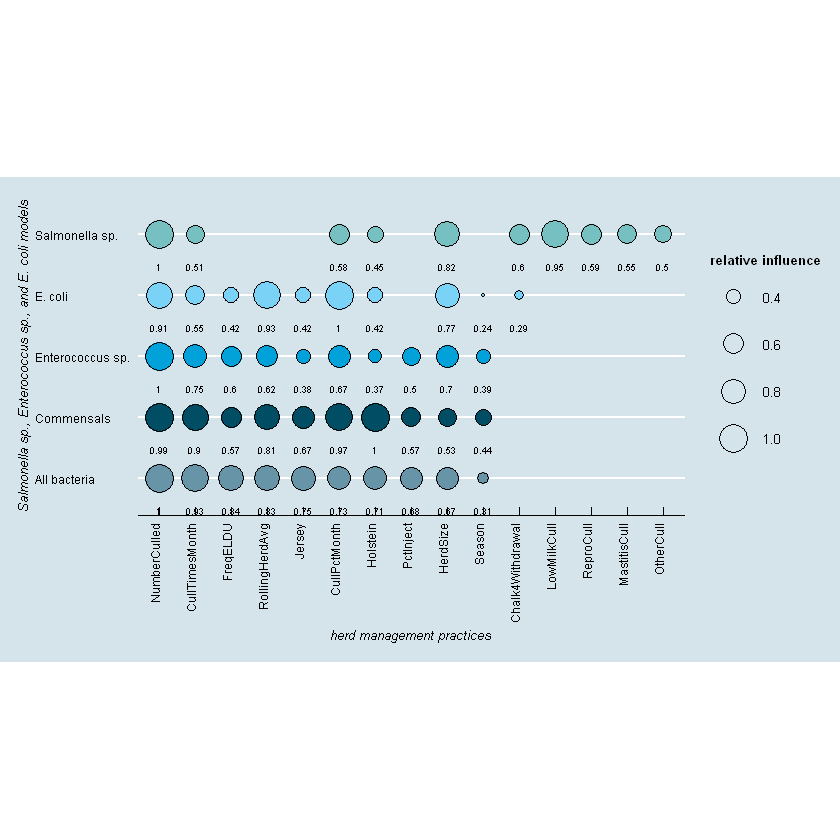

In [8]:
label <- gsub(" ","",paste(round(imp$importance,2)))
p6 <- ggplot(imp, aes(x = factor, y = model, size = importance, fill = model, label =label)) +
  theme_economist() +
  scale_fill_economist() +

  geom_point(shape = 21, stroke = 0.2) +
  geom_text(hjust = 0.5, vjust=4.5, size = 2) +  
  #ggtitle("Relative Importance of Traits") +
  scale_x_discrete(breaks=xfactors,
        limits = xfactors)+#labels=namesv
  scale_y_discrete(limits = modellist)+
    
  labs(x = "herd management practices", y = "Salmonella sp., Enterococcus sp., and E. coli models",
       size = "relative influence", fill = "models") +
        guides(fill=FALSE)+


  #scale_x_continuous(breaks = seq(1, 31, 5)) +
  scale_size(range = c(1, 8)) +
  #coord_fixed(ratio = 0.8) +
  coord_fixed(ratio = 1.7) +
  theme(legend.position = "right", legend.direction = "vertical",
        legend.box = "horizontal",
        legend.key.size = unit(1, "cm"),
        plot.title = element_text(family="Arial"),
        text = element_text(size=7),
        axis.title = element_text(size = 8, face = "italic"),
        legend.text = element_text(size = 8),
        legend.title=element_text(face = "bold", size = 8),
        axis.text.x=element_text(angle=90, hjust = 1))

ggsave(filename="C:/Users/Falco/Desktop/directory/Cattle_AMR_2/outputs/RF_IMP_bubble.pdf", plot=p6, width = 8, height = 5.9)
ggsave(filename="C:/Users/Falco/Desktop/directory/Cattle_AMR_2/outputs/RF_IMP_bubble.svg", plot=p6, width = 8, height = 5.9)
p6